<a href="https://colab.research.google.com/github/vibeeshK/Olympic-medals-and-elevation-levels/blob/main/provect_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Hypothesis Testing: Olympic Medal Count and Elevation by Country** 

*Vibeesh Kamalakannan, Rasa Blourtchi, Raghav Arora*

## **Introduction**

"I'm a mountain guy" - Khabib Nurmagomedov. Khabib Nurmagomedov, the longest reigning UFC lightweight champion credits his physicality and athleticism to his environment, saying that living and training in the mountains, was one of the reasons for his success. This sparked the start our analysis, to see whether the environmental factor of altitute really has an impact on an athletes success. And what better way to test this theory, than on the biggest sporting event in the world... The Olympics! 

"https://www.youtube.com/watch?v=U4PW800YC-A"

## **Variables**

MedalCount: Represents the number of medals (bronze, silver and gold) won by a Country from 1896 to 2016

Average Elevation: The mean elevation (altitude) of a country 

Highest Point: The max elevation (altitude) of a country

Average_Population: Population averaged from 1960 to 2021

Average_GDP: GDP averaged from 1960 to 2021



## **Hypothesis**

As the Average Elevation or Highest Point of a country increases, the country's respective medal count in the olympics also increases. 

This is because training in higher altitudes the body triggers a hormonal response that enhances the way oxygen is delivered and utilised throughout the body. Creating more blood vessels for oxygen to flow through, altitude training may lead to improved heart functionality, enhanced muscle performance and greater overall health. With more oxygen flowing through your body, recovery times are minimised while strength and endurance is enhanced. Morevoer, studies have also suggested a positive impact on stress reduction and sleep patterns, making altitude training a workout style that offers ongoing benefits.

"https://www.surgefitness.com.au/blog/what-are-the-benefits-of-altitude-training/#:~:text=Creating%20more%20blood%20vessels%20for,strength%20and%20endurance%20is%20enhanced"


## **Libraries Used**

In [ ]:
import pandas as pd 
import json
from urllib.request import urlopen # library to read data from a URL
import matplotlib.pyplot as plt # visualization library we will use that integrates with pandas
import seaborn as sns
import requests 
from bs4 import BeautifulSoup
import re 
from matplotlib.pyplot import figure
import numpy as np
from scipy.stats.stats import pearsonr
import plotly.express as px
import pandas as pd
import urllib.request
import zipfile
from pandas._libs.algos import diff_2d

plt.style.use('dark_background')
figure(figsize=(8, 6), dpi=80)

<ipython-input-170-323e4b4bbec5>:11: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

## **Data Import and Pre-Processing**

### **Highest Point**

In [ ]:
# List of highest elevation
url = "https://flagpedia.net/lists/highest-point"
data = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('td')

# Create function to remove html from the extracted strings
CLEANR = re.compile('<.*?>') 
def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext

cleanhtml(str(tables[1]))
clean_values = []
for i in tables:
  clean_values.append(cleanhtml(str(i)))
clean_values[0:20]

ele=''
clean_values=[i for i in clean_values if i!=ele]
clean_values[0:20]

df = [] 
rows = [] 
for i in clean_values:
  if len(rows)==4:
    df.append(rows)
    rows = []
    rows.append(i)
  else:
    rows.append(i)
    
highest_points = pd.DataFrame(df, columns = ['Rank', 'Country','Highest Point','Height'])  
highest_points.head()  
     

,Rank,Country,Highest Point,Height
0,1.,China,Mount Everest,8 848 m
1,2.,Nepal,Mount Everest,8 848 m
2,3.,Pakistan,K2,8 611 m
3,4.,India,Kangchenjunga,8 586 m
4,5.,Bhutan,Gangkhar Puensum,7 570 m


### **Average Elevation**

In [ ]:
# List of avg elevation
url = "https://www.atlasbig.com/en-us/countries-average-elevation"


data = requests.get(url).text

soup = BeautifulSoup(data, 'html.parser')
tables = soup.find_all('td')


cleanhtml(str(tables[1]))
clean_values = []
for i in tables:
  clean_values.append(cleanhtml(str(i)))
clean_values[0:20]

ele=''
clean_values=[i for i in clean_values if i!=ele]
clean_values[0:20]



df = [] 
rows = [] 
for i in clean_values:
  if len(rows)==2:
    df.append(rows)
    rows = []
    rows.append(i)
  else:
    rows.append(i)

average_elevation = pd.DataFrame(df, columns = ['Country','Average Elevation'])  
average_elevation.head()

,Country,Average Elevation
0,Bhutan,"3,280"
1,Nepal,"3,265"
2,Tajikistan,"3,186"
3,Kyrgyzstan,"2,989"
4,Lesotho,"2,161"


### **Olympic Data (1986-2016)**

In [ ]:
# The URL of the zip file containing the CSV file
url = 'https://github.com/vibeeshK/olmpic-dataset/blob/main/Olympic_Athletes%20(1).zip?raw=true'

# The name of the CSV file within the zip file
files_ =   ['athlete_events.csv','athlete_events_data_dictionary.csv', 'country_definitions.csv','country_definitions_data_dictionary.csv']
#csv_filename

# Download the zip file
zip_filename, _ = urllib.request.urlretrieve(url)

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_filename) as zip_file:
    with zip_file.open('athlete_events.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        athlete_events = pd.read_csv(csv_file)

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_filename) as zip_file:
    with zip_file.open('athlete_events_data_dictionary.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        athlete_events_data_dictionary = pd.read_csv(csv_file)

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_filename) as zip_file:
    with zip_file.open('country_definitions.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        country_definitions = pd.read_csv(csv_file)

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_filename) as zip_file:
    with zip_file.open('country_definitions_data_dictionary.csv') as csv_file:
        # Read the CSV file into a pandas DataFrame
        country_definitions_data_dictionary = pd.read_csv(csv_file)
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## **Data Cleaning and Merging** 

### **Olympic Data**

In [ ]:
# Split catagorical data
athlete_events['IsBronze'] = (athlete_events['Medal'] == 'Bronze').astype(int)
athlete_events['IsSilver'] = (athlete_events['Medal'] == 'Silver').astype(int)
athlete_events['IsGold'] = (athlete_events['Medal'] == 'Gold').astype(int)

In [ ]:
# Merge to get regions and NOC
olympic = pd.merge(athlete_events, country_definitions[['NOC', 'region']], on='NOC', how='left') 
olympic2 = olympic 

### **Highest Point**

In [ ]:
# Clean the highest point data
for i in range(len(olympic['region'])):
    # replace hardik with shardul
    if olympic['region'][i] == 'Boliva':
        olympic['region'][i] = 'Bolivia'

    elif olympic['region'][i] == 'Czech Republic':
        olympic['region'][i] = 'Czechia'

    elif olympic['region'][i] == 'Democratic Republic of the Congo':
        olympic['region'][i] = 'DR Congo'

    elif olympic['region'][i] == 'Ivory Coast':
        olympic['region'][i] = "Côte d'Ivoire (Ivory Coast)"

    elif olympic['region'][i] == 'Macedonia':
        olympic['region'][i] = "North Macedonia"

    elif olympic['region'][i] == 'Ivory Coast':
        olympic['region'][i] = "Côte d'Ivoire (Ivory Coast)"
    
    elif olympic['region'][i] == 'Republic of Congo':
        olympic['region'][i] = "Republic of the Congo"
      
    elif olympic['region'][i] == 'Saint Kitts':
        olympic['region'][i] = "Saint Kitts and Nevis"

    elif olympic['region'][i] == 'Saint Vincent':
        olympic['region'][i] = "Saint Vincent and the Grenadines"

    elif olympic['region'][i] == 'Swaziland':
        olympic['region'][i] = "Eswatini (Swaziland)"

    elif olympic['region'][i] == 'Trinidad':
        olympic['region'][i] = "Trinidad and Tobago"

    elif olympic['region'][i] == 'UK':
        olympic['region'][i] = "United Kingdom"

    elif olympic['region'][i] == 'USA':
        olympic['region'][i] = "United States"

    elif olympic['region'][i] == 'Virgin Islands, British':
        olympic['region'][i] = "British Virgin Islands"
    
    elif olympic['region'][i] == 'Virgin Islands, US':
        olympic['region'][i] = "United States Virgin Islands"
      
olympic.head()

<ipython-input-127-fcbff94120e0>:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-fcbff94120e0>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-fcbff94120e0>:47: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-127-fcbff94120e0>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IsBronze,IsSilver,IsGold,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,Netherlands


In [ ]:
# Group Medal Count by Country and Merge with Highest Elevation
clean_olympic = olympic
clean_olympic = clean_olympic.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
clean_olympic['MedalCount'] = (clean_olympic['IsBronze']+clean_olympic['IsSilver']+clean_olympic['IsGold']).astype(int)
clean_olympic = clean_olympic.reset_index()
clean_olympic = clean_olympic.rename(columns={'region': 'Country'})
clean_olympic_highest = pd.merge(clean_olympic, highest_points[['Country', 'Height']], on='Country', how='left')
clean_olympic_highest = clean_olympic_highest.rename(columns={'Height': 'Highest Point'}) 
clean_olympic_highest = clean_olympic_highest[clean_olympic_highest['Highest Point'].notna()]
clean_olympic_highest['Highest Point'] = clean_olympic_highest['Highest Point'].str.replace(',', '') 
clean_olympic_highest['Highest Point'] = clean_olympic_highest['Highest Point'].str.replace('m', '') 
clean_olympic_highest['Highest Point'] = clean_olympic_highest['Highest Point'].str.replace(r'\s+', '', regex=True).astype(int)
clean_olympic_highest['Highest Point'] = pd.to_numeric(clean_olympic_highest['Highest Point']) 
clean_olympic_highest.head()

<ipython-input-128-6ae70b3a7c43>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,IsGold,IsSilver,IsBronze,MedalCount,Highest Point
0,Afghanistan,0,0,2,2,7492
1,Albania,0,0,0,0,2764
2,Algeria,5,4,8,17,3003
3,American Samoa,0,0,0,0,966
4,Andorra,0,0,0,0,2942


### **Average Elevation**

In [ ]:
# Clean the avg elevation data
for i in range(len(olympic2['region'])):
    # replace hardik with shardul
    if olympic2['region'][i] == 'Boliva':
        olympic2['region'][i] = 'Bolivia'

    elif olympic2['region'][i] == 'Democratic Republic of the Congo':
        olympic2['region'][i] = 'Congo-Kinshasa'

    elif olympic2['region'][i] == 'Dominica':
        olympic2['region'][i] = 'Dominican Republic'

    elif olympic2['region'][i] == 'Ivory Coast':
        olympic2['region'][i] = "Côte d'Ivoire" 	

    elif olympic2['region'][i] == 'Netherlands':
        olympic2['region'][i] = "The Netherlands"

    elif olympic2['region'][i] == 'Republic of Congo':
        olympic2['region'][i] = "Congo-Brazzaville"
    
    elif olympic2['region'][i] == 'Russia':
        olympic2['region'][i] = "Russian Federation"

    elif olympic2['region'][i] == 'South Sudan':
        olympic2['region'][i] = "Sudan"

    elif olympic2['region'][i] == 'Trinidad':
        olympic2['region'][i] = "Trinidad and Tobago"

    elif olympic2['region'][i] == 'UK':
        olympic2['region'][i] = "United Kingdom"

    elif olympic2['region'][i] == 'United States':
        olympic2['region'][i] = "United States of America"

olympic2.head()


<ipython-input-129-df301051336e>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-df301051336e>:35: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-df301051336e>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-129-df301051336e>:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IsBronze,IsSilver,IsGold,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,The Netherlands


In [ ]:
# Group Medal Count by Country and Merge with Average Elevation
clean_olympic2 = olympic2
clean_olympic2 = clean_olympic2.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
clean_olympic2['MedalCount'] = (clean_olympic2['IsBronze']+clean_olympic2['IsSilver']+clean_olympic2['IsGold']).astype(int)
clean_olympic2 = clean_olympic2.reset_index()
clean_olympic2 = clean_olympic2.rename(columns={'region': 'Country'})
clean_olympic_avg = pd.merge(clean_olympic2, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
clean_olympic_avg = clean_olympic_avg[clean_olympic_avg['Average Elevation'].notna()]
clean_olympic_avg['Average Elevation'] = clean_olympic_avg['Average Elevation'].str.replace(',', '') 
clean_olympic_avg['Average Elevation'] = pd.to_numeric(clean_olympic_avg['Average Elevation'])   
clean_olympic_avg.head()

<ipython-input-132-41c83791d2af>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation
0,Afghanistan,0,0,2,2,1884
1,Albania,0,0,0,0,708
2,Algeria,5,4,8,17,800
4,Andorra,0,0,0,0,1996
5,Angola,0,0,0,0,1112


## **Data Visualization** 

### **Highest Point**

In [ ]:
# Highest point per country vs medals won

fig = px.scatter(clean_olympic_highest, x='Highest Point', y='MedalCount', hover_name='Country',
                 category_orders={"Highest Point": clean_olympic_highest["Highest Point"].sort_values().unique()}) 
fig.show()

### **Average Elevation**

In [ ]:
# Avg elevation vs medals

fig = px.scatter(clean_olympic_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": clean_olympic_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

## **T Test: Pearson Coefficient** 

### **Highest Point**

In [ ]:
# Pearson coefficient to find correlation between highest point and medal

pearsonr(clean_olympic_highest["Highest Point"], clean_olympic_highest["MedalCount"])


PearsonRResult(statistic=0.17584309656065222, pvalue=0.012526842829910926)

Pearson correlation coefficient (r): 0.1758 /
Two-tailed p-value: 0.01252

Since the correlation coefficient is close to 1, this tells us that there is a no association between the highest point and medals won by the country. 

### **Average Elevation**

In [ ]:
# Pearson coefficient to find correlation between avg height and medal

pearsonr(clean_olympic_avg["Average Elevation"], clean_olympic_avg["MedalCount"]) 


PearsonRResult(statistic=-0.0889243353378809, pvalue=0.2649979729790312)

Pearson correlation coefficient (r):-0.08892 / 
Two-tailed p-value: 0.264997

Since the correlation coefficient is close to 1, this tells us that there is a no association between the average elevation and medals won by the country. 



## **Conclusion**

The reason we believe our analysis failed to show a relationship between Medal Count and Elevation was because we performed this analysis on a global level. By doing so,  we were unable to keep other important factors such as GDP, Education, etc constant which are known to have a stronger impact on Olympic Medal count.


## **Next Steps**



*   Conduct Analysis only on Countries with a similar socio-economic background.
*   Conduct Analysis on Summer vs. Winter Olympics and Sport type.







# **Part 2: Hypothesis Testing: Olympic Medal Count and Elevation by Country**
### *Summer Olympics vs. Winter Olympics vs. Sport Type*

## **Data Processing and Filtering**

In [ ]:
olympic2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,IsBronze,IsSilver,IsGold,region
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,0,0,0,China
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,0,0,0,China
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,0,0,0,Denmark
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,0,0,1,Denmark
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,0,0,0,The Netherlands
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN,0,0,0,Poland
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN,0,0,0,Poland
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN,0,0,0,Poland
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN,0,0,0,Poland


### **Summer Olympics**

In [ ]:
summer = olympic2.loc[olympic2['Season'] == 'Summer'] 
summer = summer.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
summer['MedalCount'] = (summer['IsBronze']+summer['IsSilver']+summer['IsGold']).astype(int)
summer = summer.reset_index()
summer = summer.rename(columns={'region': 'Country'})
summer_avg = pd.merge(summer, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
summer_avg = summer_avg[summer_avg['Average Elevation'].notna()]
summer_avg['Average Elevation'] = summer_avg['Average Elevation'].str.replace(',', '') 
summer_avg['Average Elevation'] = pd.to_numeric(summer_avg['Average Elevation'])   
summer_avg

<ipython-input-138-a077454b4cb2>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation
0,Afghanistan,0,0,2,2,1884
1,Albania,0,0,0,0,708
2,Algeria,5,4,8,17,800
4,Andorra,0,0,0,0,1996
5,Angola,0,0,0,0,1112
...,...,...,...,...,...,...
198,Venezuela,2,3,10,15,450
199,Vietnam,1,3,0,4,398
200,Yemen,0,0,0,0,999
201,Zambia,0,1,1,2,1138


### **Winter Olympics**

In [ ]:
winter = olympic2.loc[olympic2['Season'] == 'Winter'] 
winter = winter.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
winter['MedalCount'] = (winter['IsBronze']+winter['IsSilver']+winter['IsGold']).astype(int)
winter = winter.reset_index()
winter = winter.rename(columns={'region': 'Country'})
winter_avg = pd.merge(winter, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
winter_avg = winter_avg[winter_avg['Average Elevation'].notna()]
winter_avg['Average Elevation'] = winter_avg['Average Elevation'].str.replace(',', '') 
winter_avg['Average Elevation'] = pd.to_numeric(winter_avg['Average Elevation'])   
winter_avg

<ipython-input-139-f813fdc3f132>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation
0,Albania,0,0,0,0,708
1,Algeria,0,0,0,0,800
3,Andorra,0,0,0,0,1996
4,Argentina,0,0,0,0,595
5,Armenia,0,0,0,0,1792
...,...,...,...,...,...,...
106,United States of America,166,308,161,635,760
107,Uruguay,0,0,0,0,109
108,Uzbekistan,1,0,0,1,450
109,Venezuela,0,0,0,0,450


### **Sport Type**

In [ ]:
pears = []
p_val = []
sport = []
for i in olympic2['Sport'].unique():
  try:
    sports = olympic2.loc[olympic2['Sport'] == i] 
    sports = sports.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
    sports['MedalCount'] = (sports['IsBronze']+sports['IsSilver']+sports['IsGold']).astype(int)
    sports = sports.reset_index()
    sports = sports.rename(columns={'region': 'Country'})
    sports_avg = pd.merge(sports, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
    sports_avg = sports_avg[sports_avg['Average Elevation'].notna()]
    sports_avg['Average Elevation'] = sports_avg['Average Elevation'].str.replace(',', '') 
    sports_avg['Average Elevation'] = pd.to_numeric(sports_avg['Average Elevation'])   
    pears.append(pearsonr(sports_avg["Average Elevation"], sports_avg["MedalCount"])[0])
    p_val.append(pearsonr(sports_avg["Average Elevation"], sports_avg["MedalCount"])[1])
    sport.append(i)
  except:
    pass

<ipython-input-140-7cd1fff37dec>:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## **Data Visualization**

### **Summer Olympics**

In [ ]:
fig = px.scatter(summer_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": summer_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

As we can see, there is no clear correlation here between Medal Count and Average Elevation when looking at Summer Olympic Events.

### **Winter Olympics**

In [ ]:
fig = px.scatter(winter_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": winter_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

As we can see, there is no clear correlation here between Medal Count and Average Elevation when looking at Winter Olympic Events.

### **Sport Type**

After looking at the Pearson Coefficients and p-values. We chose to create scatterplots for the only four Olympic Events that showed any form correlation and a significant p-value. The four sports were Trampoling, Table Tennis, Badminton, and Synchronized Swimming.

### *Trampolining*

In [ ]:
trampolining = olympic2.loc[olympic2['Sport'] == 'Trampolining'] 
trampolining = trampolining.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
trampolining['MedalCount'] = (trampolining['IsBronze']+trampolining['IsSilver']+trampolining['IsGold']).astype(int)
trampolining = trampolining.reset_index()
trampolining = trampolining.rename(columns={'region': 'Country'})
trampolining_avg = pd.merge(trampolining, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
trampolining_avg = trampolining_avg[trampolining_avg['Average Elevation'].notna()]
trampolining_avg['Average Elevation'] = trampolining_avg['Average Elevation'].str.replace(',', '') 
trampolining_avg['Average Elevation'] = pd.to_numeric(trampolining_avg['Average Elevation'])   
fig = px.scatter(trampolining_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": trampolining_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

<ipython-input-143-ac829a59e2d8>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### *Table Tennis*

In [ ]:
tt = olympic2.loc[olympic2['Sport'] == 'Table Tennis'] 
tt = tt.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
tt['MedalCount'] = (tt['IsBronze']+tt['IsSilver']+tt['IsGold']).astype(int)
tt = tt.reset_index()
tt = tt.rename(columns={'region': 'Country'})
tt_avg = pd.merge(tt, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
tt_avg = tt_avg[tt_avg['Average Elevation'].notna()]
tt_avg['Average Elevation'] = tt_avg['Average Elevation'].str.replace(',', '') 
tt_avg['Average Elevation'] = pd.to_numeric(tt_avg['Average Elevation'])   
fig = px.scatter(tt_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": tt_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

<ipython-input-144-36516c912ecb>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### *Badminton*

In [ ]:
badminton = olympic2.loc[olympic2['Sport'] == 'Trampolining'] 
badminton = badminton.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
badminton['MedalCount'] = (badminton['IsBronze']+badminton['IsSilver']+badminton['IsGold']).astype(int)
badminton = badminton.reset_index()
badminton = badminton.rename(columns={'region': 'Country'})
badminton_avg = pd.merge(badminton, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
badminton_avg = badminton_avg[badminton_avg['Average Elevation'].notna()]
badminton_avg['Average Elevation'] = badminton_avg['Average Elevation'].str.replace(',', '') 
badminton_avg['Average Elevation'] = pd.to_numeric(badminton_avg['Average Elevation'])   
fig = px.scatter(badminton_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": badminton_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

<ipython-input-145-3934dbf644d9>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### *Synchronized Swimming*

In [ ]:
ss = olympic2.loc[olympic2['Sport'] == 'Synchronized Swimming'] 
ss = ss.groupby('region')['IsGold', 'IsSilver', 'IsBronze'].sum()
ss['MedalCount'] = (ss['IsBronze']+ss['IsSilver']+ss['IsGold']).astype(int)
ss = ss.reset_index()
ss = ss.rename(columns={'region': 'Country'})
ss_avg = pd.merge(ss, average_elevation[['Country', 'Average Elevation']], on='Country', how='left')
ss_avg = ss_avg[ss_avg['Average Elevation'].notna()]
ss_avg['Average Elevation'] = ss_avg['Average Elevation'].str.replace(',', '') 
ss_avg['Average Elevation'] = pd.to_numeric(ss_avg['Average Elevation'])   
fig = px.scatter(ss_avg, x='Average Elevation', y='MedalCount', hover_name='Country',
                 category_orders={"Average Elevation": ss_avg["Average Elevation"].sort_values().unique()}) 
fig.show()

<ipython-input-146-72422b4d65f3>:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



## **T Test: Pearson Coefficient** 

### **Summer Olympics**

In [ ]:
pearsonr(summer_avg["Average Elevation"], summer_avg["MedalCount"])

PearsonRResult(statistic=-0.09251879284951471, pvalue=0.24608856831626558)

Pearson correlation coefficient (r):-0.0925 / 
Two-tailed p-value: 0.24608

Since the correlation coefficient is close to 0.1, this tells us that there is a no association between the average elevation and medals won by the country when considering Summer Olympic Events.

### **Winter Olmpics**

In [ ]:
pearsonr(winter_avg["Average Elevation"], winter_avg["MedalCount"])

PearsonRResult(statistic=-0.09173302121507936, pvalue=0.3844765795722149)

Pearson correlation coefficient (r):-0.0917 / Two-tailed p-value: 0.38448

Since the correlation coefficient is close to 0.1, this tells us that there is a no association between the average elevation and medals won by the country when considering Winter Olympic Events.

### **Sport Type**

In [ ]:
events = {'Sport': sport, "Pearson's Coefficient": pears,"P Value": p_val}
events = pd.DataFrame(data=events)
events = events.sort_values("Pearson's Coefficient") 
events = events.iloc[3:]
events

,Sport,Pearson's Coefficient,P Value
60,Alpinism,-0.468407,0.348775
3,Tug-Of-War,-0.445934,0.126683
41,Baseball,-0.278220,0.315345
20,Hockey,-0.268303,0.113611
13,Art Competitions,-0.190063,0.200680
30,Canoeing,-0.188705,0.098007
44,Rugby Sevens,-0.173941,0.569816
10,Sailing,-0.168560,0.116443
28,Cycling,-0.164781,0.081138
32,Modern Pentathlon,-0.157643,0.274234


Above you can find all the Pearson Coefficients and p-values by Sport Type

# **Part 3: Hypothesis Testing: Olympic Medal Count and Elevation by Country**
### *Population & GDP Adjusted*

## **Data Import and Pre-Processing**

### **Population**

In [ ]:
url = 'https://github.com/vibeeshK/olmpic-dataset/raw/main/Population%20Data%20(1).xlsx'
population  = pd.read_excel(url)

population

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Population_Average
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,...,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0,106537.0,7.698861e+04
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,...,567891875.0,583650827.0,600008150.0,616377331.0,632746296.0,649756874.0,667242712.0,685112705.0,702976832.0,3.459694e+08
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,...,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0,40099462.0,1.804367e+07
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,...,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0,478185907.0,2.357148e+08
4,Angola,AGO,"Population, total",SP.POP.TOTL,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,...,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0,34503774.0,1.451323e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1788878.0,1790133.0,1786038.0,1.598995e+06
262,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5542459.0,5646668.0,5753386.0,5860197.0,5973803.0,6097298.0,...,26984002.0,27753304.0,28516545.0,29274002.0,30034389.0,30790513.0,31546691.0,32284046.0,32981641.0,1.554513e+07
263,South Africa,ZAF,"Population, total",SP.POP.TOTL,16520441.0,16989464.0,17503133.0,18042215.0,18603097.0,19187194.0,...,53873616.0,54729551.0,55876504.0,56422274.0,56641209.0,57339635.0,58087055.0,58801927.0,59392255.0,3.826222e+07
264,Zambia,ZMB,"Population, total",SP.POP.TOTL,3119430.0,3219451.0,3323427.0,3431381.0,3542764.0,3658024.0,...,15234976.0,15737793.0,16248230.0,16767761.0,17298054.0,17835893.0,18380477.0,18927715.0,19473125.0,8.878663e+06


### **GDP**


In [ ]:
url = 'https://github.com/vibeeshK/olmpic-dataset/raw/main/GDP%20(1).csv'
gdp = pd.read_csv(url)

gdp

,Country,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,GDP_Average
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.727933e+09,2.791061e+09,2.963128e+09,2.983799e+09,3.092179e+09,3.202235e+09,3.368970e+09,2.610039e+09,3.126019e+09,2006595301
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.129152e+10,2.180944e+10,2.370806e+10,2.821128e+10,2.611994e+10,2.968348e+10,...,9.826770e+11,1.003400e+12,9.231440e+11,8.898590e+11,1.030480e+12,1.016700e+12,1.009050e+12,9.341790e+11,1.089450e+12,3.53538E+11
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10,2.014344e+10,1.478686e+10,7722577009
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.040414e+10,1.112789e+10,1.194319e+10,1.267633e+10,1.383837e+10,1.486223e+10,...,8.322170e+11,8.924980e+11,7.669580e+11,6.905450e+11,6.837480e+11,7.663600e+11,7.947190e+11,7.848000e+11,8.401870e+11,2.47269E+11
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.334020e+11,1.372440e+11,8.721930e+10,4.984049e+10,6.897277e+10,7.779294e+10,6.930911e+10,5.361907e+10,6.740429e+10,37939660063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09,9.412034e+09,6780315068
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.041523e+10,4.322859e+10,4.244450e+10,3.131783e+10,2.684223e+10,2.160616e+10,NaN,NaN,NaN,18230152814
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,8.748597e+09,9.225996e+09,9.813996e+09,1.085420e+10,1.195600e+10,1.306899e+10,...,4.008860e+11,3.811990e+11,3.467100e+11,3.235860e+11,3.814490e+11,4.041600e+11,3.885320e+11,3.376200e+11,4.190150e+11,1.6234E+11
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,7.130000e+08,6.962857e+08,6.931429e+08,7.187143e+08,8.394286e+08,1.082857e+09,...,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10,2.214763e+10,7685751286


## **Data Merging**

In [ ]:
# Olympic Dataset
population_olympic = pd.merge(clean_olympic_avg, population[['Country', 'Population_Average']], on='Country', how='left')
pop_gdp_olympic = pd.merge(population_olympic, gdp[['Country', 'GDP_Average']], on='Country', how='left')
pop_gdp_olympic = pop_gdp_olympic[pop_gdp_olympic['Average Elevation'].notna()]
pop_gdp_olympic['Average Elevation'] = pd.to_numeric(pop_gdp_olympic['Average Elevation'])
pop_gdp_olympic

# Summer Olympics 
population_summer = pd.merge(summer_avg, population[['Country', 'Population_Average']], on='Country', how='left')
pop_gdp_summer = pd.merge(population_summer, gdp[['Country', 'GDP_Average']], on='Country', how='left')
pop_gdp_summer = pop_gdp_summer[pop_gdp_summer['Average Elevation'].notna()] 
pop_gdp_summer['Average Elevation'] = pd.to_numeric(pop_gdp_summer['Average Elevation'])
pop_gdp_summer

# Winter Olympics 
population_winter = pd.merge(winter_avg, population[['Country', 'Population_Average']], on='Country', how='left')
pop_gdp_winter = pd.merge(population_winter, gdp[['Country', 'GDP_Average']], on='Country', how='left')
pop_gdp_winter = pop_gdp_winter[pop_gdp_winter['Average Elevation'].notna()] 
pop_gdp_winter['Average Elevation'] = pd.to_numeric(pop_gdp_winter['Average Elevation'])
pop_gdp_winter


,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation,Population_Average,GDP_Average
0,Albania,0,0,0,0,708,2.712054e+06,7188044170
1,Algeria,0,0,0,0,800,2.560887e+07,69838425359
2,Andorra,0,0,0,0,1996,4.952982e+04,1627000982
3,Argentina,0,0,0,0,595,3.277564e+07,2.11517E+11
4,Armenia,0,0,0,0,1792,2.932083e+06,6503475442
...,...,...,...,...,...,...,...,...
87,United States of America,166,308,161,635,760,2.563010e+08,7.93559E+12
88,Uruguay,0,0,0,0,109,3.087452e+06,19074008782
89,Uzbekistan,1,0,0,1,450,2.068203e+07,35058405025
90,Venezuela,0,0,0,0,450,NaN,NaN


## **Data Binning** 

### **Olympic Dataset**

In [ ]:
cols_to_convert = ['IsGold', 'IsSilver', 'IsBronze','MedalCount', 'Average Elevation', 'Population_Average', 'GDP_Average']
pop_gdp_olympic[cols_to_convert] = pop_gdp_olympic[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# create Population_bin and GDP_bin columns
pop_gdp_olympic['Population_bin'] = pd.qcut(pop_gdp_olympic['Population_Average'], q=10, labels=False)
pop_gdp_olympic['GDP_bin'] = pd.qcut(pop_gdp_olympic['GDP_Average'], q=10, labels=False)

# create Country_bin column
pop_bins = pd.qcut(pop_gdp_olympic['Population_Average'], q=10, labels=False, duplicates='drop')
gdp_bins = pd.qcut(pop_gdp_olympic['GDP_Average'], q=10, labels=False, duplicates='drop')
pop_gdp_olympic['Country_bin'] = pd.Series(pop_bins + gdp_bins, dtype=int)
pop_gdp_olympic['Country_bin'] = pd.cut(pop_gdp_olympic['Country_bin'], bins=10, labels=['<10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

# print the resulting dataframe
pop_gdp_olympic

,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation,Population_Average,GDP_Average,Population_bin,GDP_bin,Country_bin
0,Afghanistan,0,0,2,2,1884,1.804367e+07,7.722577e+09,7.0,3.0,50-60%
1,Albania,0,0,0,0,708,2.712054e+06,7.188044e+09,2.0,2.0,20-30%
2,Algeria,5,4,8,17,800,2.560887e+07,6.983843e+10,7.0,6.0,70-80%
3,Andorra,0,0,0,0,1996,4.952982e+04,1.627001e+09,0.0,0.0,<10%
4,Angola,0,0,0,0,1112,1.451323e+07,3.793966e+10,6.0,6.0,60-70%
...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2,3,10,15,450,NaN,NaN,NaN,NaN,NaN
155,Vietnam,1,3,0,4,398,6.603165e+07,1.075760e+11,9.0,7.0,80-90%
156,Yemen,0,0,0,0,999,NaN,NaN,NaN,NaN,NaN
157,Zambia,0,1,1,2,1138,8.878663e+06,7.685751e+09,5.0,3.0,40-50%


### **Summer Olympics**

In [ ]:
cols_to_convert = ['IsGold', 'IsSilver', 'IsBronze','MedalCount', 'Average Elevation', 'Population_Average', 'GDP_Average']
pop_gdp_summer[cols_to_convert] = pop_gdp_summer[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# create Population_bin and GDP_bin columns
pop_gdp_summer['Population_bin'] = pd.qcut(pop_gdp_summer['Population_Average'], q=10, labels=False)
pop_gdp_summer['GDP_bin'] = pd.qcut(pop_gdp_summer['GDP_Average'], q=10, labels=False)

# create Country_bin column
pop_bins = pd.qcut(pop_gdp_summer['Population_Average'], q=10, labels=False, duplicates='drop')
gdp_bins = pd.qcut(pop_gdp_summer['GDP_Average'], q=10, labels=False, duplicates='drop')
pop_gdp_summer['Country_bin'] = pd.Series(pop_bins + gdp_bins, dtype=int)
pop_gdp_summer['Country_bin'] = pd.cut(pop_gdp_summer['Country_bin'], bins=10, labels=['<10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

# print the resulting dataframe
pop_gdp_summer

,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation,Population_Average,GDP_Average,Population_bin,GDP_bin,Country_bin
0,Afghanistan,0,0,2,2,1884,1.804367e+07,7.722577e+09,7.0,3.0,50-60%
1,Albania,0,0,0,0,708,2.712054e+06,7.188044e+09,2.0,2.0,20-30%
2,Algeria,5,4,8,17,800,2.560887e+07,6.983843e+10,7.0,6.0,70-80%
3,Andorra,0,0,0,0,1996,4.952982e+04,1.627001e+09,0.0,0.0,<10%
4,Angola,0,0,0,0,1112,1.451323e+07,3.793966e+10,6.0,6.0,60-70%
...,...,...,...,...,...,...,...,...,...,...,...
154,Venezuela,2,3,10,15,450,NaN,NaN,NaN,NaN,NaN
155,Vietnam,1,3,0,4,398,6.603165e+07,1.075760e+11,9.0,7.0,80-90%
156,Yemen,0,0,0,0,999,NaN,NaN,NaN,NaN,NaN
157,Zambia,0,1,1,2,1138,8.878663e+06,7.685751e+09,5.0,3.0,40-50%


### **Winter Olympics**



In [ ]:
cols_to_convert = ['IsGold', 'IsSilver', 'IsBronze','MedalCount', 'Average Elevation', 'Population_Average', 'GDP_Average']
pop_gdp_winter[cols_to_convert] = pop_gdp_winter[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# create Population_bin and GDP_bin columns
pop_gdp_winter['Population_bin'] = pd.qcut(pop_gdp_winter['Population_Average'], q=10, labels=False)
pop_gdp_winter['GDP_bin'] = pd.qcut(pop_gdp_winter['GDP_Average'], q=10, labels=False)

# create Country_bin column
pop_bins = pd.qcut(pop_gdp_winter['Population_Average'], q=10, labels=False, duplicates='drop')
gdp_bins = pd.qcut(pop_gdp_winter['GDP_Average'], q=10, labels=False, duplicates='drop')
pop_gdp_winter['Country_bin'] = pd.Series(pop_bins + gdp_bins, dtype=int)
pop_gdp_winter['Country_bin'] = pd.cut(pop_gdp_winter['Country_bin'], bins=10, labels=['<10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%'])

# print the resulting dataframe
pop_gdp_winter

,Country,IsGold,IsSilver,IsBronze,MedalCount,Average Elevation,Population_Average,GDP_Average,Population_bin,GDP_bin,Country_bin
0,Albania,0,0,0,0,708,2.712054e+06,7.188044e+09,1.0,1.0,10-20%
1,Algeria,0,0,0,0,800,2.560887e+07,6.983843e+10,7.0,5.0,60-70%
2,Andorra,0,0,0,0,1996,4.952982e+04,1.627001e+09,0.0,0.0,<10%
3,Argentina,0,0,0,0,595,3.277564e+07,2.115170e+11,7.0,7.0,70-80%
4,Armenia,0,0,0,0,1792,2.932083e+06,6.503475e+09,1.0,0.0,<10%
...,...,...,...,...,...,...,...,...,...,...,...
87,United States of America,166,308,161,635,760,2.563010e+08,7.935590e+12,9.0,9.0,90-100%
88,Uruguay,0,0,0,0,109,3.087452e+06,1.907401e+10,1.0,3.0,20-30%
89,Uzbekistan,1,0,0,1,450,2.068203e+07,3.505841e+10,6.0,4.0,50-60%
90,Venezuela,0,0,0,0,450,NaN,NaN,NaN,NaN,NaN


## **T Test: Pearson Coefficient** 

### **Olympic Dataset**

In [ ]:
pears = []
p_val = []
bin_val = []
bins = ['<10%','10-20%','20-30%','30-40%','40-50%','50-60%','60-70%','70-80%','80-90%','90-100%']

for i in bins:

  data = pop_gdp_olympic_bin = pop_gdp_olympic.loc[pop_gdp_olympic['Country_bin'] == i]
  pears.append(pearsonr(data["Average Elevation"], data["MedalCount"])[0])
  p_val.append(pearsonr(data["Average Elevation"], data["MedalCount"])[1])
  bin_val.append(i)

gdp_all = pd.DataFrame()
gdp_all['Bin'] = bin_val
gdp_all["Pearson's Coefficient"] = pears
gdp_all['P Value'] = p_val
gdp_all

,Bin,Pearson's Coefficient,P Value
0,<10%,0.033800,0.908678
1,10-20%,0.632370,0.049776
2,20-30%,-0.198360,0.461460
3,30-40%,-0.191685,0.358667
4,40-50%,-0.052648,0.852175
5,50-60%,-0.461563,0.297153
6,60-70%,-0.030742,0.910015
7,70-80%,-0.523627,0.054641
8,80-90%,-0.361651,0.203887
9,90-100%,-0.123096,0.675040


The 10-20% and 70-80% bins are both correlated and significant at an alpha level of 0.1.

### **Summer Olympics**

In [ ]:
pears = []
p_val = []
bin_val = []
for i in bins:
  data = pop_gdp_summer.loc[pop_gdp_summer['Country_bin'] == i]
  pears.append(pearsonr(data["Average Elevation"], data["MedalCount"])[0])
  p_val.append(pearsonr(data["Average Elevation"], data["MedalCount"])[1])
  bin_val.append(i)

summer_pop_gdp = pd.DataFrame()
summer_pop_gdp['Bin'] = bin_val
summer_pop_gdp["Pearson's Coefficient"] = pears
summer_pop_gdp['P Value'] = p_val
summer_pop_gdp

,Bin,Pearson's Coefficient,P Value
0,<10%,0.033800,0.908678
1,10-20%,0.632370,0.049776
2,20-30%,-0.188975,0.483342
3,30-40%,-0.173733,0.406236
4,40-50%,-0.051132,0.856392
5,50-60%,-0.493822,0.260024
6,60-70%,-0.186698,0.488724
7,70-80%,-0.565549,0.035048
8,80-90%,-0.340769,0.233156
9,90-100%,-0.119403,0.684324


The 10-20% and 70-80% bins are both correlated and significant at an alpha level of 0.05.

## **Winter Olympics**

In [ ]:
pears = []
p_val = []
bin_val = [] 
for i in bins:
  data = pop_gdp_winter.loc[pop_gdp_winter['Country_bin'] == i]
  pears.append(pearsonr(data["Average Elevation"], data["MedalCount"])[0])
  p_val.append(pearsonr(data["Average Elevation"], data["MedalCount"])[1])
  bin_val.append(i) 

winter_pop_gdp = pd.DataFrame()
winter_pop_gdp['Bin'] = bin_val
winter_pop_gdp["Pearson's Coefficient"] = pears
winter_pop_gdp['P Value'] = p_val
winter_pop_gdp = winter_pop_gdp.iloc[1:]
winter_pop_gdp

/usr/local/lib/python3.9/dist-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



,Bin,Pearson's Coefficient,P Value
1,10-20%,-0.361349,0.379138
2,20-30%,-0.170229,0.616783
3,30-40%,-0.195165,0.674951
4,40-50%,-0.102149,0.809800
5,50-60%,-0.621669,0.262914
6,60-70%,0.063881,0.835754
7,70-80%,-0.586772,0.096729
8,80-90%,0.128987,0.917655
9,90-100%,-0.135868,0.690390


The 70-80% bin is both correlated and significant at an alpha level of 0.1.

## **Data Visualization**

### **Olympic Dataset**



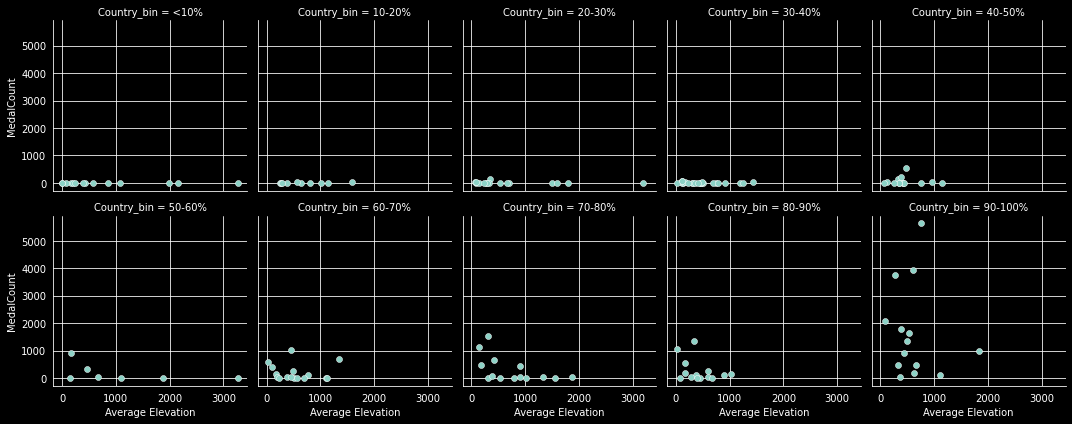

In [ ]:
# create a FacetGrid object and specify the x-axis, y-axis, and data source
grid = sns.FacetGrid(pop_gdp_olympic, col='Country_bin', col_wrap=5)
grid.map(sns.scatterplot, 'Average Elevation', 'MedalCount')

# display the plots
plt.show()

### **Summer Olympics**



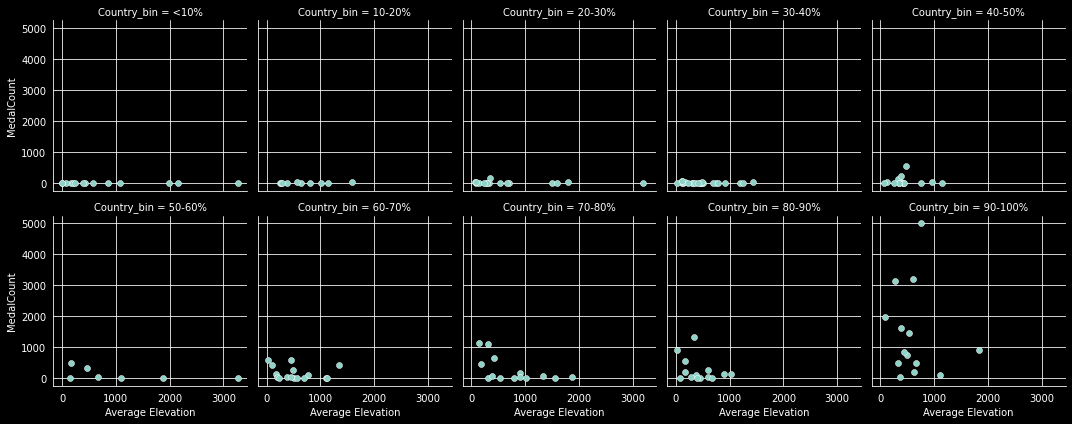

In [ ]:
# create a FacetGrid object and specify the x-axis, y-axis, and data source
grid = sns.FacetGrid(pop_gdp_summer, col='Country_bin', col_wrap=5)
grid.map(sns.scatterplot, 'Average Elevation', 'MedalCount')

# display the plots
plt.show()

### **Winter Olympics**



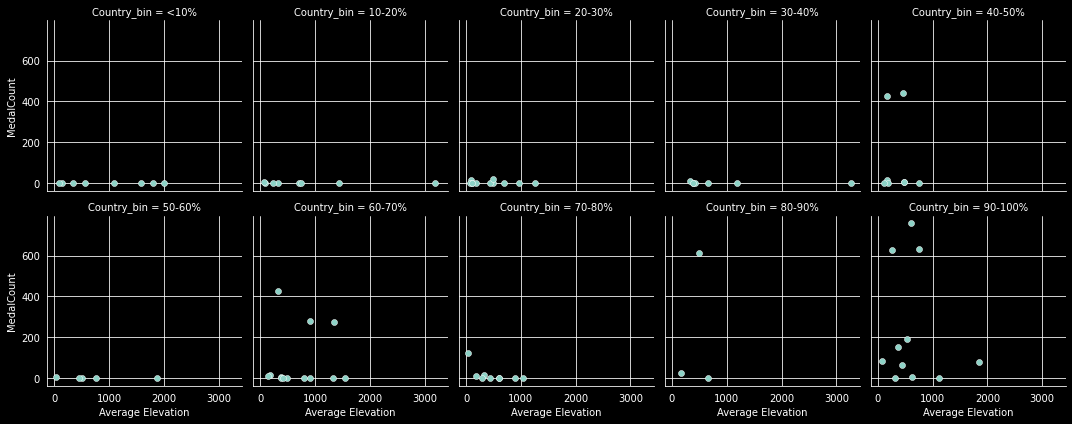

In [ ]:
# create a FacetGrid object and specify the x-axis, y-axis, and data source
grid = sns.FacetGrid(pop_gdp_winter, col='Country_bin', col_wrap=5)
grid.map(sns.scatterplot, 'Average Elevation', 'MedalCount')

# display the plots
plt.show()

## **Conclusion**

When looking at the details of the olympics season, our analysis showed that there was no correlation between MedalCount and Average Elevation in terms of summer and winter seasons. However, with regards to Sports Type there was a notable Sport (Trampolining), that showed a slighlty positive correlation and a significant p value between MedalCount and Average Elevation. Other sports such as Table Tennis and Badminton also has very low levels of correlation but Trampolining was a standout.

Since, not much of a relationship was found with this analysis, we decicded to extend our analysis by adjusting our olympics dataset with regards to population and GDP. In doing so, we were able to find a moderate relationship between MedalCount and Average Elevation with regards to countries in the 10%-20% and 70%-80% country_bins. 

Although the 10%-20%, bins supported our hypothesis, the higher 70%-80% bins went against our hypothesis. We belive this is because for countries  in the high GDP and population range group, average elevation does not matter as much as the other factors itself. However, for countries with low GDP and population such as those in the 10%-20% bins, average elevation is one of the distinguising factors that might determine MedalCount.